In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
data =pd.read_csv('TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')
data.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0


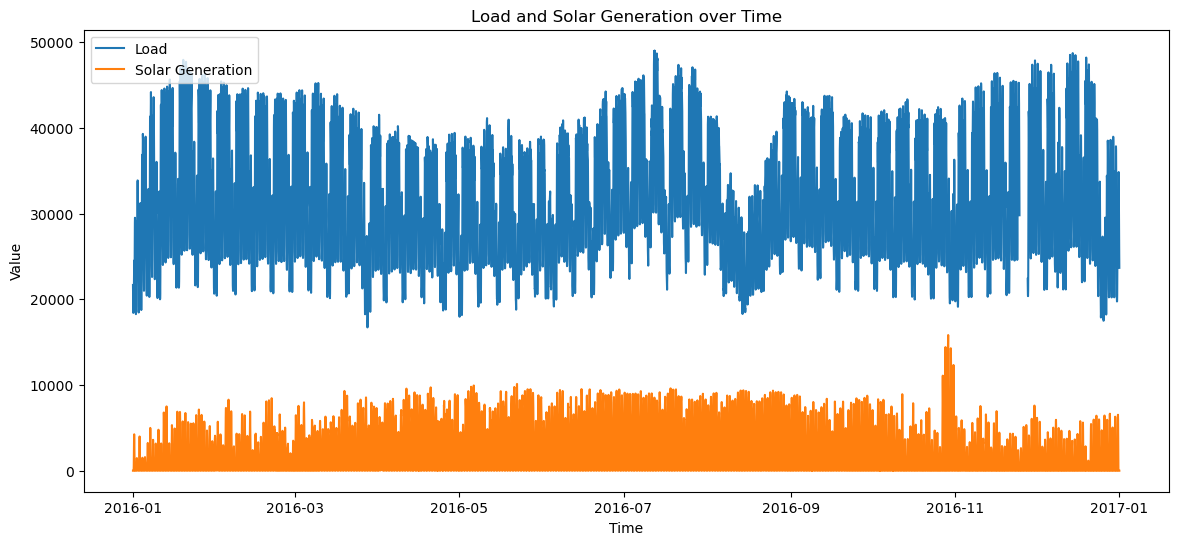

In [6]:
# Vizualize the Data 
data['utc_timestamp']=pd.to_datetime(data['utc_timestamp']) 

plt.figure(figsize=(14,6)) 

plt.plot(data['utc_timestamp'],data['IT_load_new'],label='Load')
plt.plot(data['utc_timestamp'],data['IT_solar_generation'],label='Solar Generation') 
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend() 
plt.title('Load and Solar Generation over Time')
plt.show()

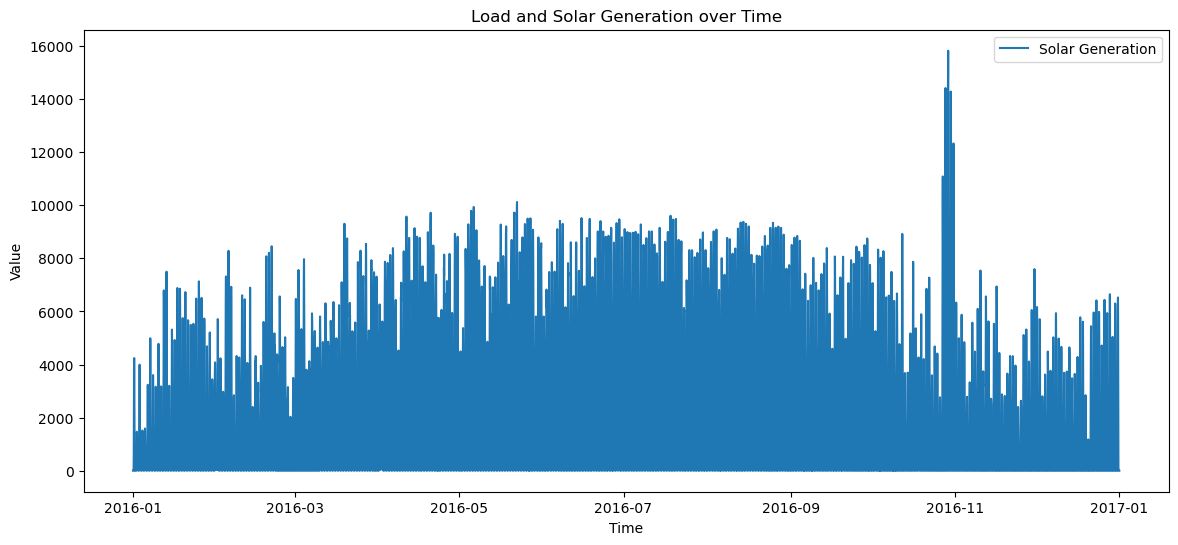

In [7]:
 # Vizualize the Data 
data['utc_timestamp']=pd.to_datetime(data['utc_timestamp']) 

plt.figure(figsize=(14,6)) 

# plt.plot(data['utc_timestamp'],data['IT_load_new'],label='Load')
plt.plot(data['utc_timestamp'],data['IT_solar_generation'],label='Solar Generation') 
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend() 
plt.title('Load and Solar Generation over Time')
plt.show()

In [8]:
### Handle Missing values
data.isnull().sum()

utc_timestamp           0
IT_load_new            72
IT_solar_generation     0
dtype: int64

In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries): 
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of the Observation Used']) 
    for key,value in dftest[4].items() :
        dfoutput[f'Critical Value {key}'] =value  
    print(dfoutput)

In [13]:
## fill the missing value using forward fill 
data['IT_load_new'] = data['IT_load_new'].ffill()

## check for missing values again 
print('Missing values after filling: ')
print(data.isnull().sum()) 

## perform Augmented Dickey-fuller test again 
print('\nADF test for "IT_load_new" after filling missing values  : ') 
adf_test(data['IT_load_new']) 

print('\nADF test for "IT_solar_generation" :') 
adf_test(data['IT_solar_generation'])

Missing values after filling: 
utc_timestamp          0
IT_load_new            0
IT_solar_generation    0
dtype: int64

ADF test for "IT_load_new" after filling missing values  : 
Result of Dickey-Fuller Test:
Test Statistic                   -1.197390e+01
p-value                           3.841445e-22
#Lags Used                        3.700000e+01
Number of the Observation Used    8.746000e+03
Critical Value 1%                -3.431098e+00
Critical Value 5%                -2.861871e+00
Critical Value 10%               -2.566946e+00
dtype: float64

ADF test for "IT_solar_generation" :
Result of Dickey-Fuller Test:
Test Statistic                   -5.741335e+00
p-value                           6.265438e-07
#Lags Used                        3.600000e+01
Number of the Observation Used    8.747000e+03
Critical Value 1%                -3.431098e+00
Critical Value 5%                -2.861870e+00
Critical Value 10%               -2.566946e+00
dtype: float64


### Check for Stationarity test 

In [14]:
# perform test for 'IT_load_new' 
print("ADF test for 'IT_Load_new'")
adf_test(data['IT_load_new']) 

# perform test for 'IT_Solar_generation' 
print('\nADF test for "IT_Solar_generation"') 
adf_test(data['IT_solar_generation']) 

ADF test for 'IT_Load_new'
Result of Dickey-Fuller Test:
Test Statistic                   -1.197390e+01
p-value                           3.841445e-22
#Lags Used                        3.700000e+01
Number of the Observation Used    8.746000e+03
Critical Value 1%                -3.431098e+00
Critical Value 5%                -2.861871e+00
Critical Value 10%               -2.566946e+00
dtype: float64

ADF test for "IT_Solar_generation"
Result of Dickey-Fuller Test:
Test Statistic                   -5.741335e+00
p-value                           6.265438e-07
#Lags Used                        3.600000e+01
Number of the Observation Used    8.747000e+03
Critical Value 1%                -3.431098e+00
Critical Value 5%                -2.861870e+00
Critical Value 10%               -2.566946e+00
dtype: float64


### Build ARIMA model for 'IT_load_new'

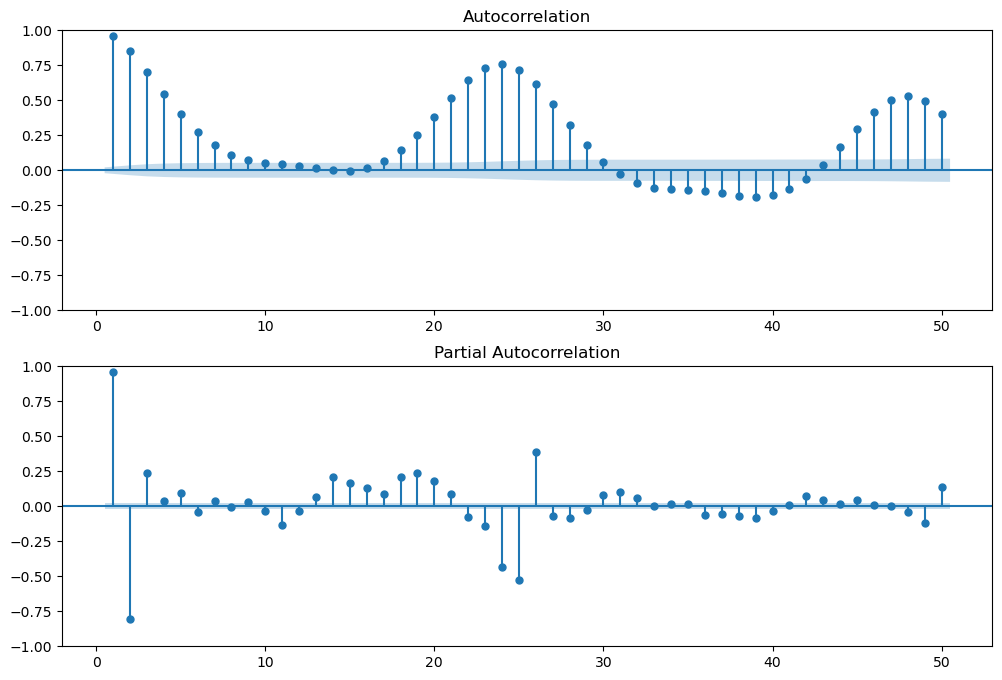

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

#PLOT ACF and PACF 
fig ,(ax1,ax2) =plt.subplots(2,1,figsize=(12,8)) 
plot_acf(data['IT_load_new'],lags=50,zero=False,ax=ax1)
plot_pacf(data['IT_load_new'],lags=50,zero=False,ax=ax2)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_squared_error
from math import sqrt 

# 